In [43]:
#Magic stack overflow code that makes the borders look nicer
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

display(HTML("""
<style>
    div.output_scroll {height: 40em; }
</style>
"""))

## Time Series Forecasting and Model Validation in Python

- Dow Draper
- Governor's School for Science and Technology
- 2022-2023
- Brett Warren at MITRE


### Literature
Studies such as Rabbani's (Rabbani et al,  2021) have looked at the difference between time series forecasting methods, however these have been not been generalized to fit any model on any time series split to work with any time series data. This project uses statistical methods to determine the best model for any specific time series data. In order to do this, packages such as pandas are implemented for their elegant and simple syntax (McKinney et al, 2011).

### Justification
The objective of this project was to learn methods for time series forecasting and implementing them in Python. An existing problem present in many studies is a lack of relevant justification for the time series forecasting method used, instead defaulting to an ARIMA or SARIMA model. The flight dataset was chosen to match this end, however the validation methods used can be applied to any time series. An example use case for this method is presented. This method is important because it creates an empirical approach for model selection as opposed to an arbitrary one.

### General Process
* Collection 
* Cleaning
* Analysis
* Forecasting


### Outlook
Import the data &rarr; Convert strings to datetime objects &rarr; Aggregate quantitative data &rarr; <br>Perform time series splits &rarr; Implement models &rarr; Measure accuracy with metrics &rarr; Forecast best models &rarr; Conclusion

#### Example use case:
Airport terminal buisnesses need to know the traffic forecasted in order to optimize the purchase of stocked items, hiring employees, and security expenses. At a naive level, these expenses can be shown on a monthly level as a proportion of a given month in year x to year x's total traffic. In order to estimate the population of a future year in order to predict expenses, a common method employed is time series analysis. This study looks at different types of time series models and uses statistical methods to choose the best model. 

## Importing Data

Before the data can be used, it first must be imported. This data was collected from this website and downloaded using a torrent client: https://academictorrents.com/details/a2ccf94bbb4af222bf8e69dad60a68a29f310d9a


In [44]:
import pandas as pd

cols = ["Origin", "Destination", "Origin City", "Destination City", "Passengers", "Seats", "Flights",
        "Distance", "Fly Date", "Origin Population", "Destination Population"]
dat = pd.read_csv(r"data/flight_edges.tsv", sep="\t", names=cols)
dat.head()

Origin Destination    Origin City Destination City  Passengers  Seats  \
0    MHK         AMW  Manhattan, KS         Ames, IA           1     30   
1    EUG         RDM     Eugene, OR         Bend, OR          41    396   
2    EUG         RDM     Eugene, OR         Bend, OR          88    342   
3    EUG         RDM     Eugene, OR         Bend, OR          11     72   
4    MFR         RDM    Medford, OR         Bend, OR           0     18   

   Flights  Distance  Fly Date  Origin Population  Destination Population  
0        1     254.0    200810             122049                   86219  
1       22     103.0    199011             284093                   76034  
2       19     103.0    199012             284093                   76034  
3        4     103.0    199010             284093                   76034  
4        1     156.0    199002             147300                   76034

### Demonstration

Assume that the airport terminal we are looking at is at the John F. Kennedy International Airport. This analysis can be performed easily on any city or on all city's as a whole with one or two lines of code thanks to pandas' simple syntax.

In [45]:
dat = dat[dat["Destination"] == "JFK"]
dat.head()

Origin Destination    Origin City Destination City  Passengers  Seats  \
0    MHK         AMW  Manhattan, KS         Ames, IA           1     30   
1    EUG         RDM     Eugene, OR         Bend, OR          41    396   
2    EUG         RDM     Eugene, OR         Bend, OR          88    342   
3    EUG         RDM     Eugene, OR         Bend, OR          11     72   
4    MFR         RDM    Medford, OR         Bend, OR           0     18   

   Flights  Distance  Fly Date  Origin Population  Destination Population  
0        1     254.0    200810             122049                   86219  
1       22     103.0    199011             284093                   76034  
2       19     103.0    199012             284093                   76034  
3        4     103.0    199010             284093                   76034  
4        1     156.0    199002             147300                   76034

### Indexing based on datetime objects

In order to turn the data into a real time series, the string value of the Fly Date column must be turned into a scalar value to sort by. The data is then indexed by this rather than the potentially arbitrary order in which it came.

In [46]:
dat["Fly Date"] = pd.to_datetime(dat["Fly Date"], format="%Y%m")
dat.set_index("Fly Date", inplace=True)
dat = dat.sort_index()
dat.head()

Origin Destination     Origin City Destination City  Passengers  \
Fly Date                                                                     
1990-01-01    SEA         ORD     Seattle, WA      Chicago, IL        1713   
1990-01-01    CLE         EWR   Cleveland, OH       Newark, NJ        1476   
1990-01-01    CRW         ROA  Charleston, WV      Roanoke, VA         388   
1990-01-01    CLE         EWR   Cleveland, OH       Newark, NJ        1337   
1990-01-01    CLE         EWR   Cleveland, OH       Newark, NJ        2787   

            Seats  Flights  Distance  Origin Population  \
Fly Date                                                  
1990-01-01   4410       30    1721.0            5154164   
1990-01-01   4619       31     404.0            2103367   
1990-01-01   2100       21     114.0             307480   
1990-01-01   3348       31     404.0            2103367   
1990-01-01   4888       52     404.0            2103367   

            Destination Population  
Fly Date                            
1990-01-01                16395048  
1990-01-01                16868983  
1990-01-01                  269195  
1990-01-01                16868983  
1990-01-01                16868983

## Cleaning the Data

If we are looking exclusively at passengers, then there isn't any need to contain the other data columns. Here, we are adding up all the variables that occur on the same month and year in order to get a total passengers per month. Other columns that make sense to add are seats and flights, but distance, origin population, and destination population don't have very many use cases when aggregated, so they are dropped. 

In [47]:
dat = dat[["Passengers", "Seats", "Flights"]].groupby(dat.index).sum()
dat.head(24)

Passengers     Seats  Flights
Fly Date                                 
1990-01-01    27605138  55539260   422366
1990-02-01    27010787  49894444   379961
1990-03-01    32948359  56465593   429472
1990-04-01    31177552  55149836   420019
1990-05-01    31203382  56815046   435517
1990-06-01    32904499  55641274   426642
1990-07-01    33370927  57541575   441353
1990-08-01    35732969  58294474   446416
1990-09-01    28583070  54913628   421588
1990-10-01    31292501  57517372   442574
1990-11-01    29506897  54241620   415163
1990-12-01    29068331  54601902   416165
1991-01-01    27589042  54993408   423954
1991-02-01    25959057  48225126   372213
1991-03-01    30113227  54305223   417373
1991-04-01    30870009  53912424   420706
1991-05-01    31356167  55579362   430957
1991-06-01    32326875  54984792   426659
1991-07-01    33780413  57017072   443201
1991-08-01    35202173  57288495   445031
1991-09-01    28665032  53976410   420317
1991-10-01    31465105  56344484   445676
1991-11-01    28454432  52859492   415038
1991-12-01    30908409  54881263   430592

### Demonstration


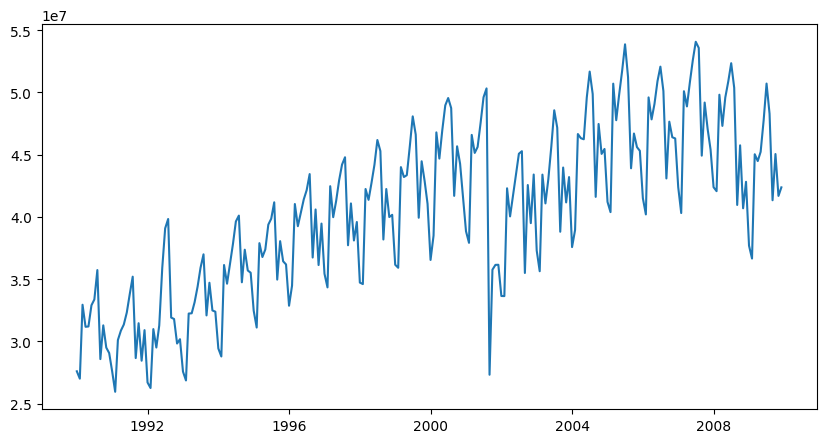

In [48]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline
plt.plot(dat["Passengers"])
plt.show()

## Time Series Splits

In order to validate a model's accuracy, the data must be broken into a training set that the model learns from, and a test set that the model is tested against. In time series, this data can't be taken randomly, and instead the test set is usually taken from the most recent n years, with the training set being everything before. Some time series splits that are shown in this example are 1990-2009, 1990-2008, 1990-2007, and 2004-2009. 

Below is the bulk of the code used to implement these tests. This is necessary in order to call the function once on each model and time series split we want to look at, rather than calling every metric on every model on every time series split, which would take a very long time and be much less organized.

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
class seriesSplits:
    def __init__(self, dat):
        self.test = {}
        self.train = {}
        self.dat = dat
        self.models = {}
        self.performance = pd.DataFrame({"split":[], "title":[], "R2":[], "MSE":[], "MAE":[]})
        
        
    def split(self, testStart, trainStart):
        #Splits until a year, that year is included in the test set
        self.test[(trainStart, testStart)] = self.dat[testStart:].drop(["Flights", "Seats"], axis=1)
        self.train[(trainStart, testStart)] = self.dat[trainStart:str(int(testStart) - 1)].drop(["Flights", "Seats"], axis=1)
    
    def show(self, testStart, trainStart= '1990', *, metrics=False):
        #Stores a new time series split
        if (trainStart, testStart) not in self.test:
            self.split(testStart, trainStart)
        #If there are models, plot each model and save their metrics to a dataframe
        #If metrics is true, show the metrics in the graphs as well
        if len(self.models) != 0:
            figure, axis = plt.subplots(1, len(self.models))
            for index, i in enumerate(self.models):
                plt.figure(index+1)
                plt.subplot(111)
                plt.plot(self.train[(trainStart, testStart)], label = "Training Data")
                plt.plot(self.test[(trainStart, testStart)], label = "Test Data")
                plt.plot(pred := self.models[i].forecast(self.train[(trainStart, testStart)], self.test[(trainStart, testStart)]), label="Model Forecast")
                
                r2, mse, mae = self.metric(self.test[(trainStart, testStart)], pred)
                if not ((self.performance['split'] == trainStart+'-'+testStart) & (self.performance['title'] == i)).any():
                    self.performance.loc[len(self.performance.index)] = [trainStart+'-'+testStart, i, r2, mse, mae]
                    
                if metrics:
                    plt.text(10, 10, "R2=" + str(r2) + "\nMSE=" + str(mse) + "\nMAE=" + str(mae), fontsize = 10)
                plt.title(i)
                plt.legend()
        #If there are no models, just plot the training and test sets
        else:
            plt.figure(1)
            plt.plot(self.train[(trainStart, testStart)], label = "Training Data")
            plt.plot(self.test[(trainStart, testStart)], label = "Test Data")
            plt.title("Training from " + trainStart + "-" + testStart)
            plt.legend()
        plt.show()
    
    #Shows the best model in the current split for a number of years past the split. Does not show training and test sets.
    #Requires the show function to be called first as the metrics are calculated then
    def showBest(self, years=1):
        figureCount = 1
        metricsDct = {"R2":lambda x: x[x['R2'] == x['R2'].max()], "MSE":lambda x: x[x['MSE'] == x['MSE'].min()], 
                      "MAE":lambda x: x[x['MAE'] == x['MAE'].min()]}
        for i in metricsDct:
            currentGroupBy = self.performance.groupby(by=['split']).apply(metricsDct[i])
            for j in currentGroupBy['split'].unique():
                currentModels = currentGroupBy[currentGroupBy['split'] == j]['title']
                for k in currentModels:
                    plt.figure(figureCount)
                    figureCount += 1
                    plt.subplot(111)
                    plt.plot(self.dat["Passengers"], label = "Data")
                    plt.plot(self.models[k].predict(self.dat, years), label="Forecast")
                    plt.title(f"Best Forecast for {i} in the {j} split forecasted {years} years ({k})")
                    plt.legend()
                    
            
        plt.show()
    
    #Add a new model to the current split object
    def addModel(self, model):
        self.models[model.title] = model
    
    #Returns the metrics to measure accuracy
    def metric(self, true, pred):
        r2 = r2_score(true, pred)
        mse = mean_squared_error(true, pred)
        mae = mean_absolute_error(true, pred)
        return r2, mse, mae
    
y = seriesSplits(dat)

### Demonstration

Below are demonstrations of different types of time series splits, the training sets are in blue and the test sets are in orange.

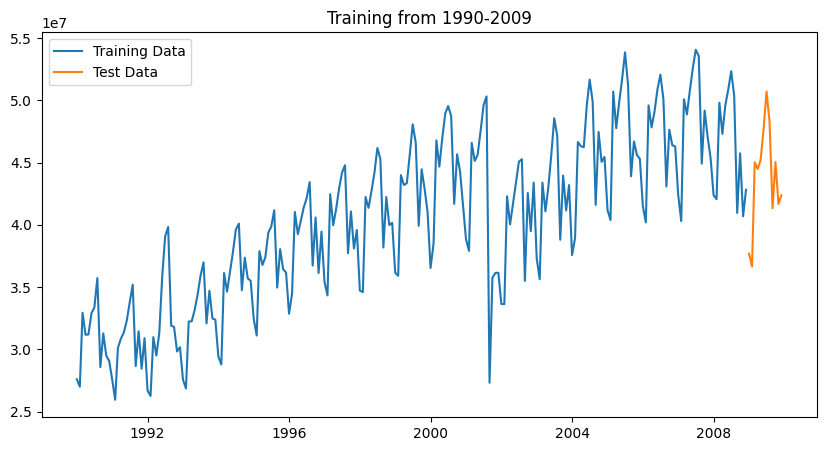

In [50]:
y.show('2009')

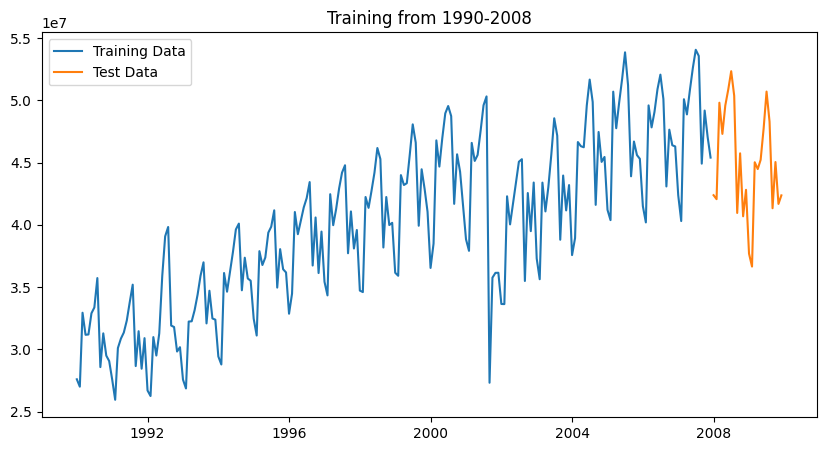

In [51]:
y.show('2008')

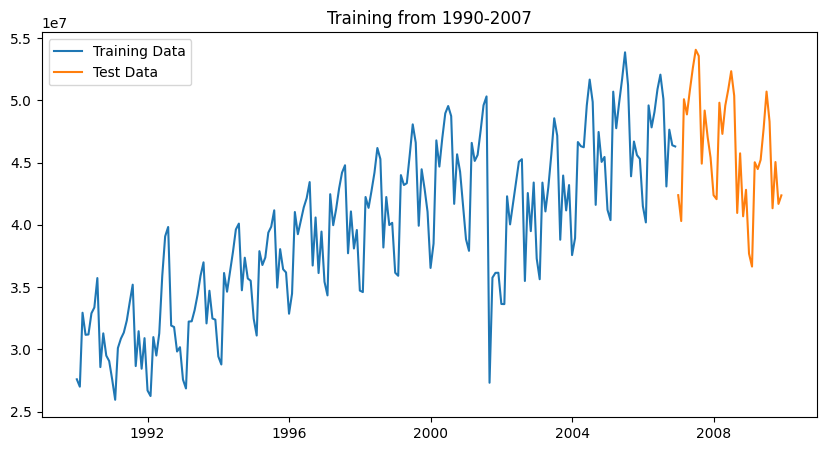

In [52]:
y.show('2007')

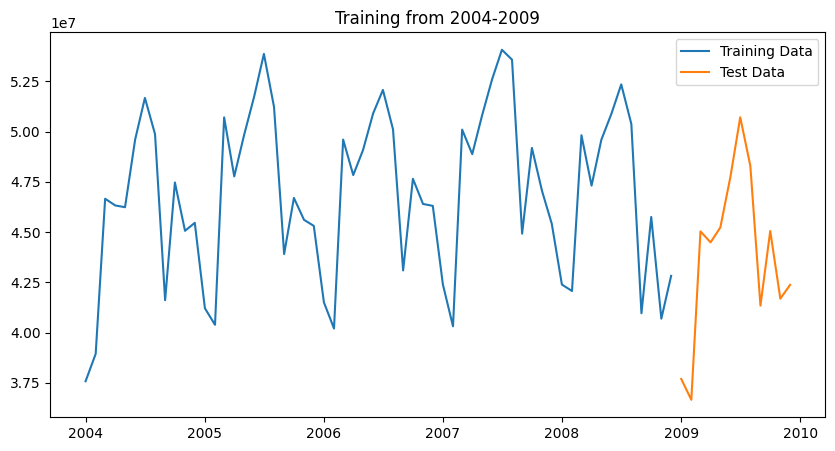

In [53]:
y.show('2009', '2004')

## Models

In this example, two types of time series analysis models will be looked at: Exponential Smoothing, and ARMA models. Simple Exponential Smoothing contains a level component that's an exponentially weighted sum of the prior entries. Holt Exponential Smoothing adds a trend component that accounts for change in the rate of change of the data. Holt-Winters Exponential Smoothing adds a seasonality component that accounts for seasonal fluctuations in the data. Finally, the Error, Trend, and Seasonality model adds an error component that accounts for a change in the average random error of the data. ARMA models instead perform
autoregression on the last p terms of the data, and moving averages on the last q terms of the data. ARIMA models add a differencing parameter, d, that accounts for trend in the data. SARIMA models have two components, a seasonal and a subseasonal ARIMA model that have parameters P, D, Q, m and p, d, q respectively, where m is the number of periods in a season. 

|Model|Explanation|Accounts for|
|:---|:---|---:|
|Simple Exponential Smoothing|Exponentially weighted sum of previous components|Level|
|Holt Exponential Smoothing|Exponentially weighted sum of previous components that trends over time|Level, Trend|
|Holt-Winters Exponential Smoothing|Exponentially weighted sum of previous components that includeds a trend and seasonality component|Level, Trend, Seasonality|
|ETS Model|Exponentially weighted sum that has error, trend, and seasonality (ETS) components|Level, Trend, Seasonality, Error|
|ARMA (Not included)|Performs autoregression on the last p terms and a moving average on the last q terms|Level|
|ARIMA|Performs autoregression on the last p terms, differences the data d times, and performs a moving average on the last q terms|Level, Trend|
|SARIMA|Has a subseasonal ARIMA model that does autoregression, differencing, and moving average on the last p, d, and q terms<br />, and a seasonal ARIMA model that does the same on the seasonal level for the last P, D, and Q terms, with m being the number of entries in a subseason|Level, Trend, Seasonality|
|SARIMAX (Not included)|Same as SARIMA, but includes a factor for exogenous components|Level, Trend, Seasonality, Error|


Below is code that is used to interact with the previous class in order to simply display every model on a time series split.

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.arima.model import ARIMA

import numpy as np
class modelClass:
    def __init__(self, model, title, kwargs, ts=None):
        self.title = title
        self.model = model
        self.kwargs = kwargs 
        self.ts = ts
        if ts != None:
            self.ts.addModel(self)
    
    def forecast(self, train, test):
        fore = test.copy()
        fore["forecast"] = self.model(np.asarray(train["Passengers"]), **self.kwargs).fit().forecast(len(test))
        return fore["forecast"]
    
    def predict(self, dat, length):
        pred = pd.DataFrame({'Fly Date':[]})
        for i in range(0, length*12):
            pred.loc[len(pred.index)] = [str(2010 + i//12) + str((i%12)+1).rjust(2, '0')]
        pred['Fly Date'] = pd.to_datetime(pred['Fly Date'], format="%Y%m")
        pred.set_index('Fly Date', inplace = True)
        pred['forecast'] = self.model(np.asarray(dat["Passengers"]), **self.kwargs).fit().forecast(len(pred))
        return pred["forecast"]
        

modelClass(SimpleExpSmoothing, "Simple Exponential Smoothing", {}, y)
modelClass(ExponentialSmoothing, "Holt Exponential Smoothing", {"trend":"add"}, y)
modelClass(ExponentialSmoothing, "Holt-Winters Exponential Smoothing", {"trend":"add", "seasonal":"add", "seasonal_periods":12}, y)
modelClass(ETSModel, "ETS Exponential Smoothing", {"trend":"add", "seasonal":"add", "error":"add", "seasonal_periods":12}, y)
modelClass(ARIMA, "ARIMA", {"order":(12,1,12)}, y)
modelClass(ARIMA, "SARIMA", {"order":(1,1,0), "seasonal_order":(1,1,0,12)}, y)

### Demonstration

C:\Users\Dow\AppData\Local\Temp\ipykernel_10748\737423935.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-X

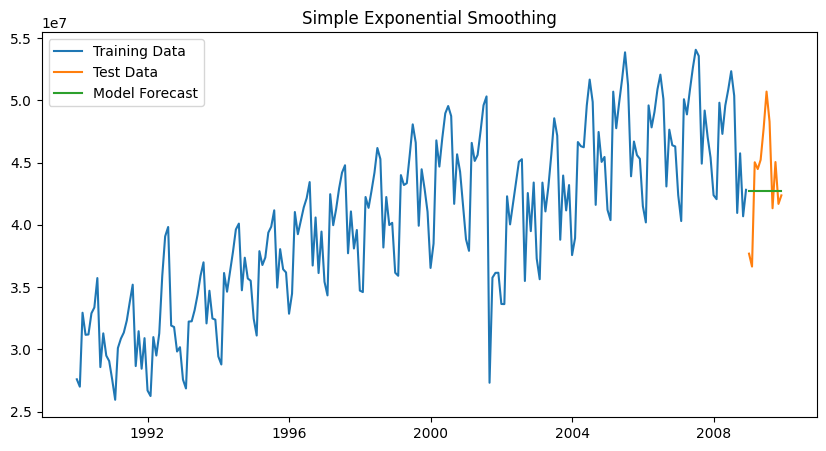

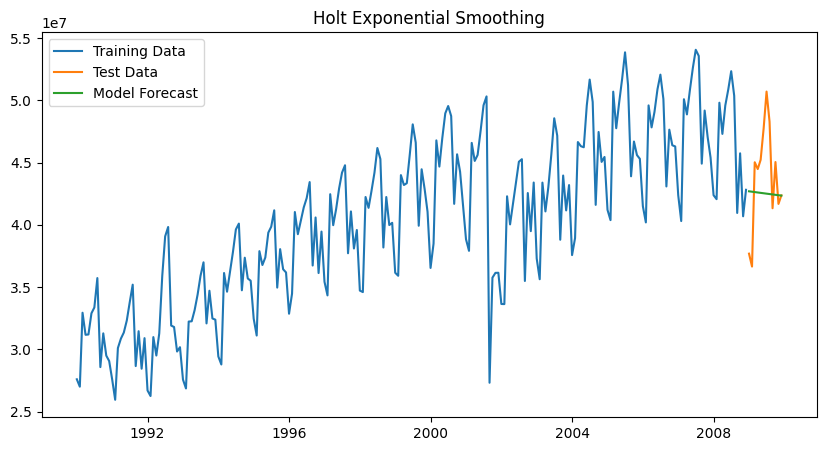

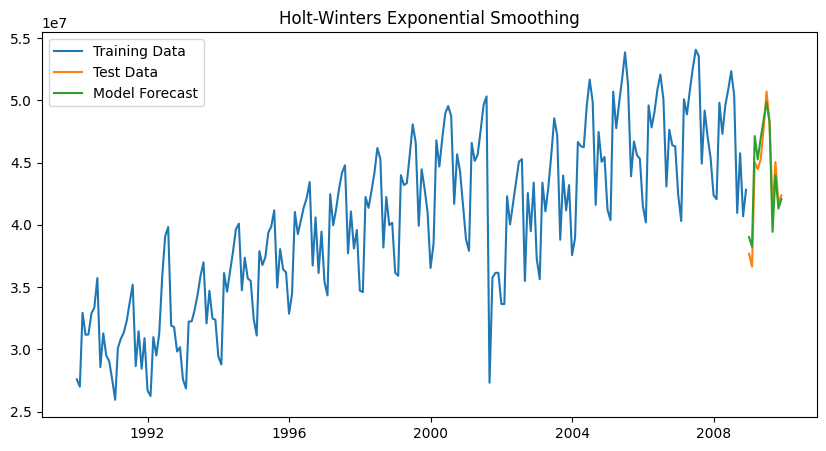

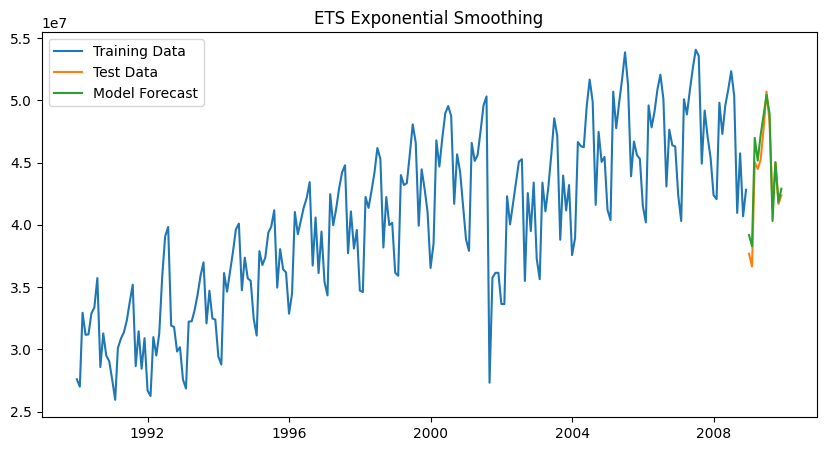

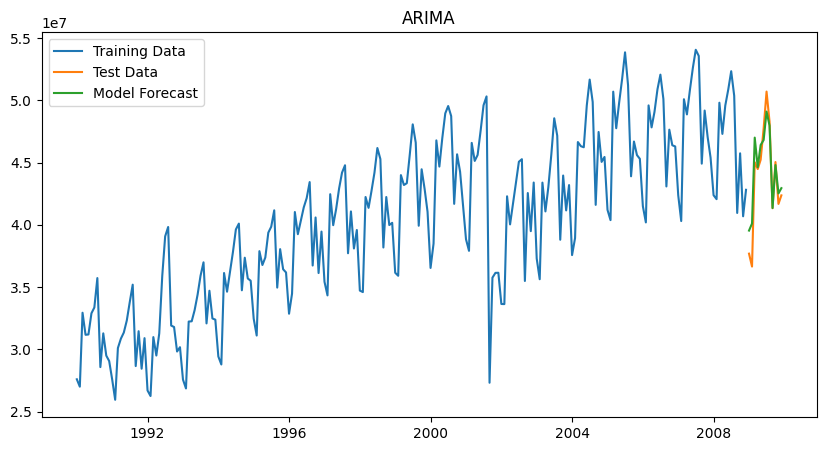

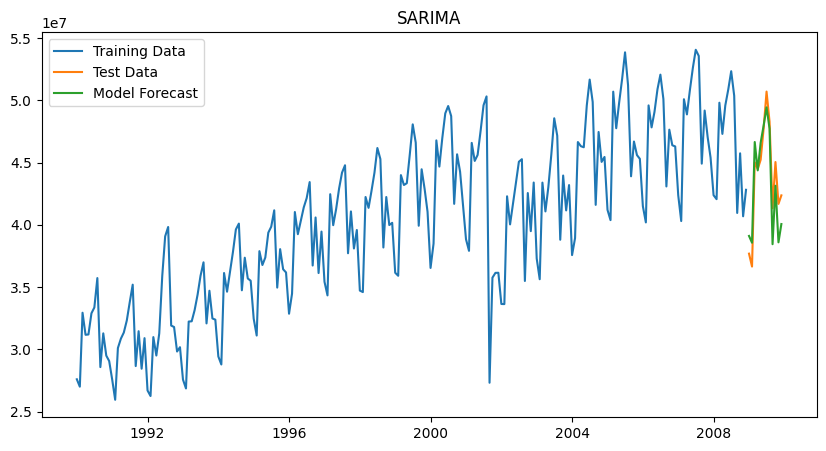

In [55]:
y.show('2009')

C:\Users\Dow\AppData\Local\Temp\ipykernel_10748\737423935.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-X

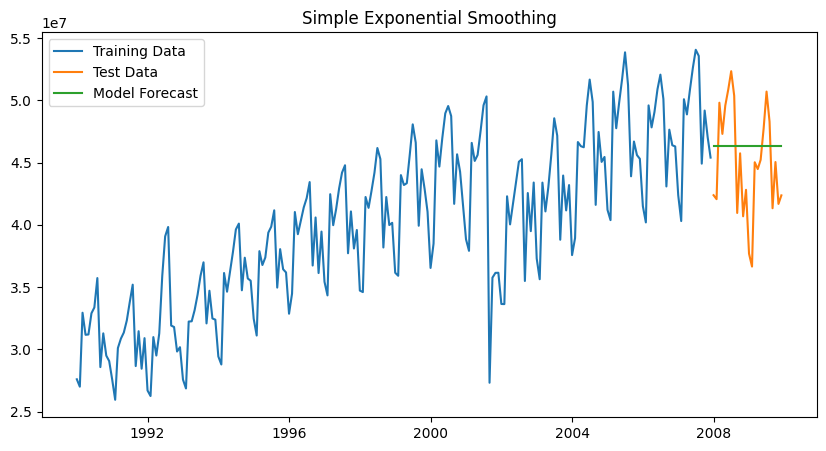

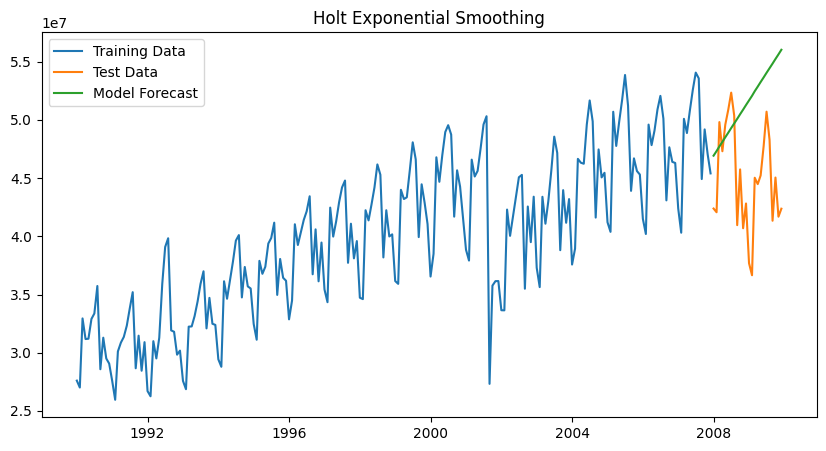

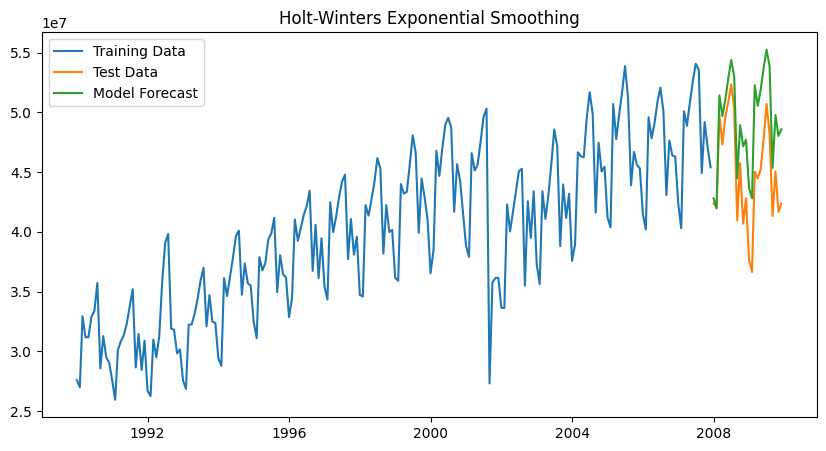

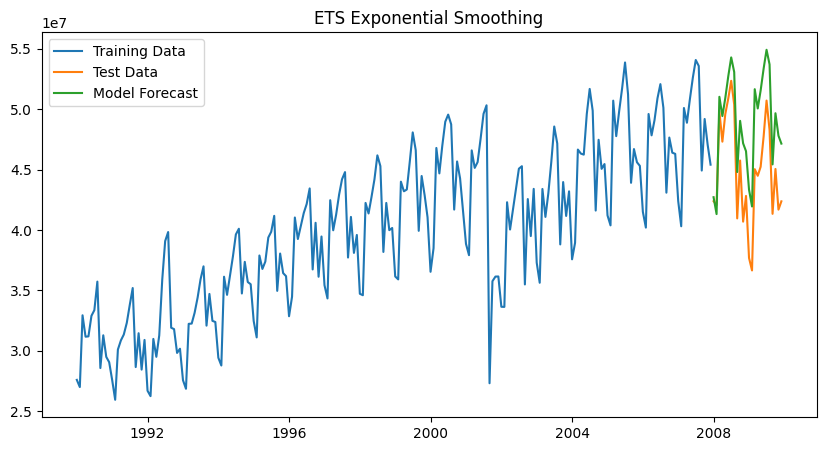

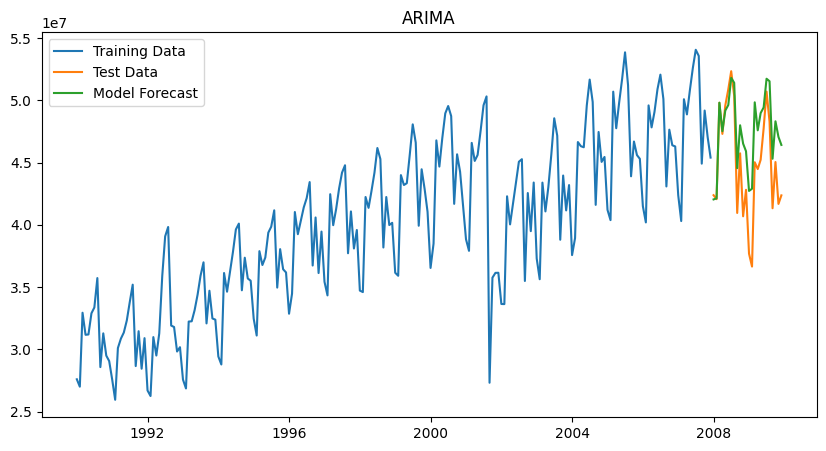

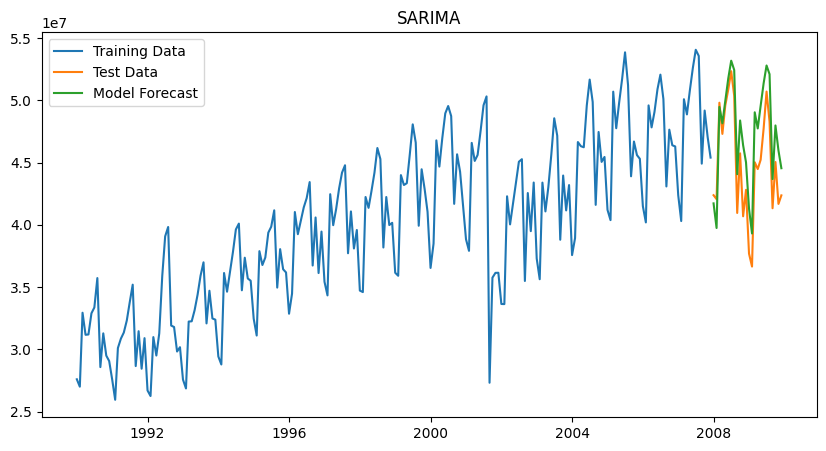

In [56]:
y.show('2008')

C:\Users\Dow\AppData\Local\Temp\ipykernel_10748\737423935.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-X

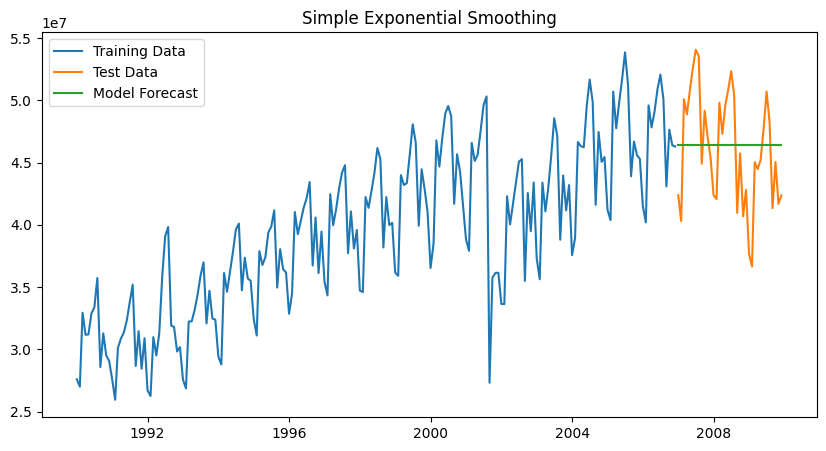

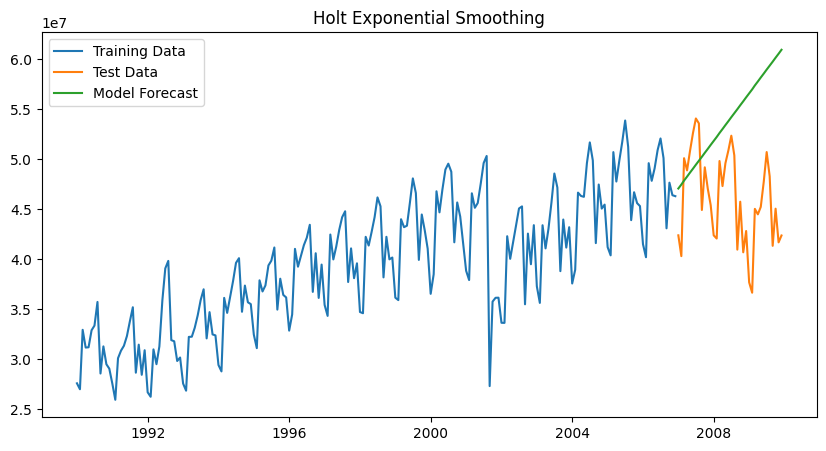

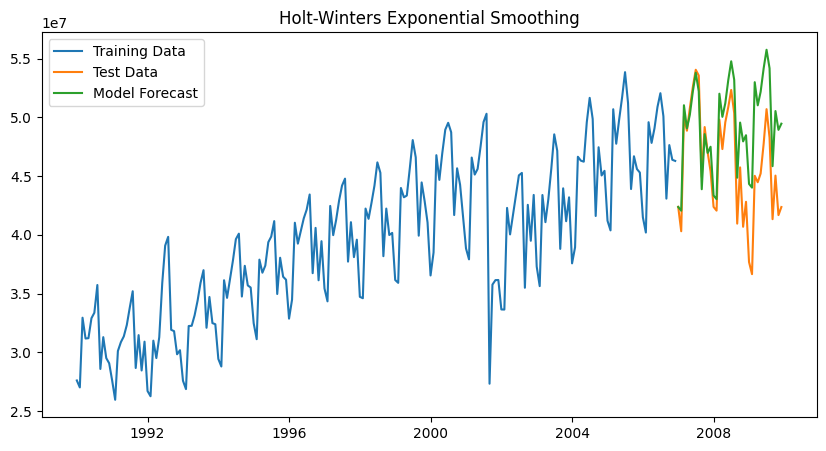

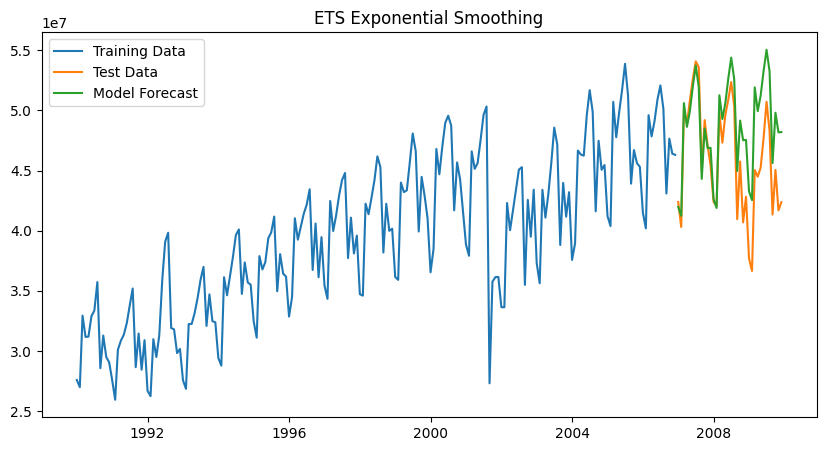

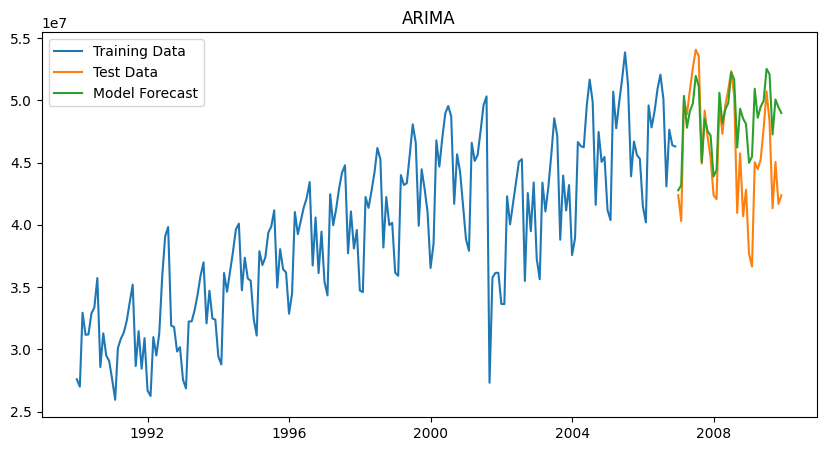

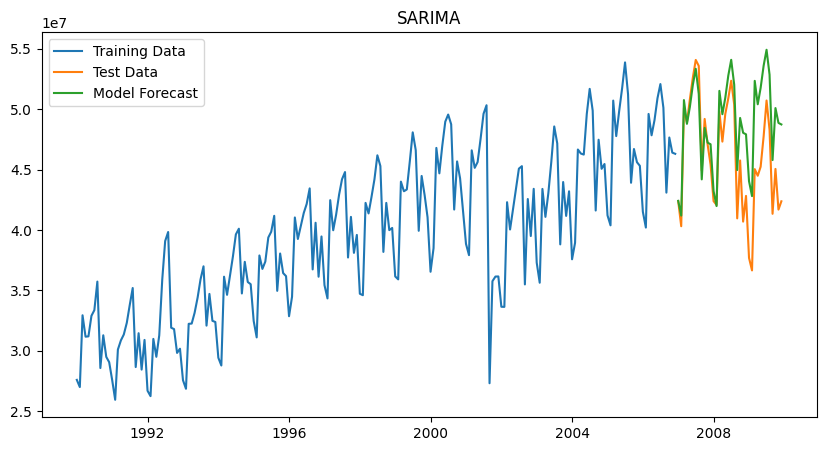

In [57]:
y.show('2007')

C:\Users\Dow\AppData\Local\Temp\ipykernel_10748\737423935.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-X

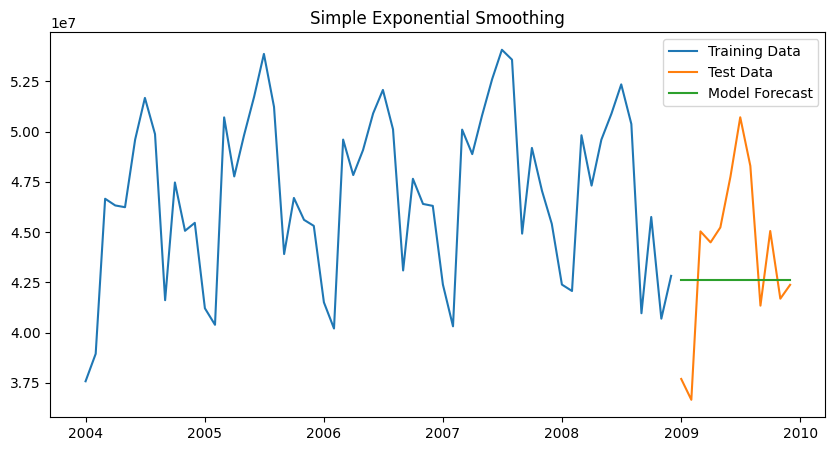

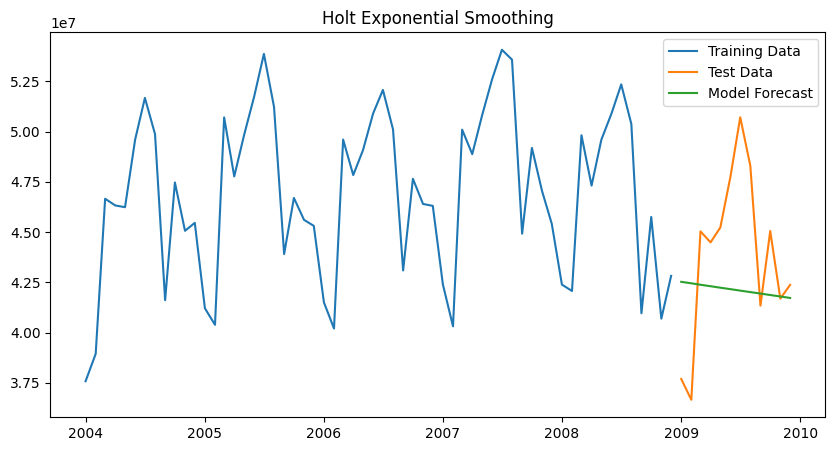

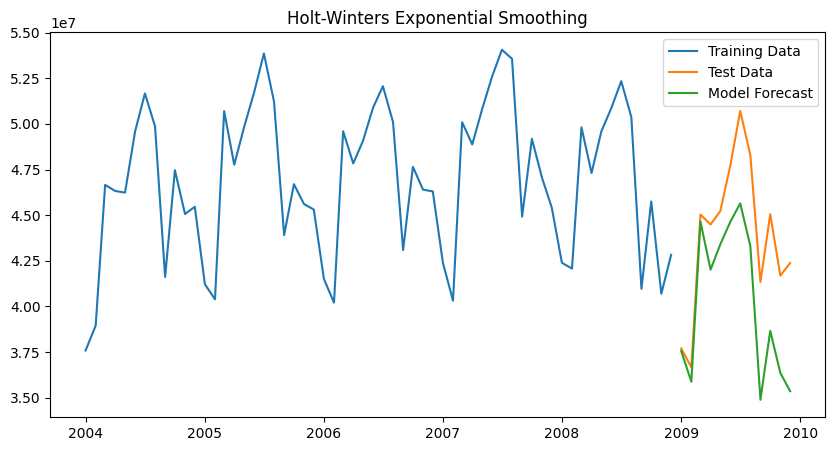

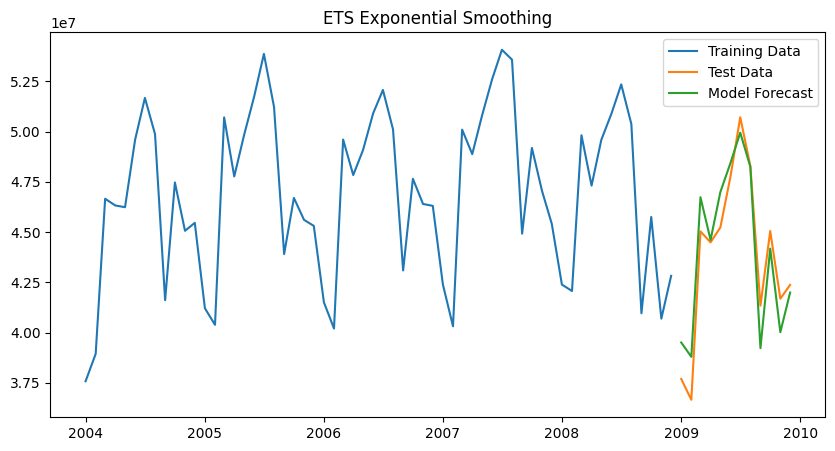

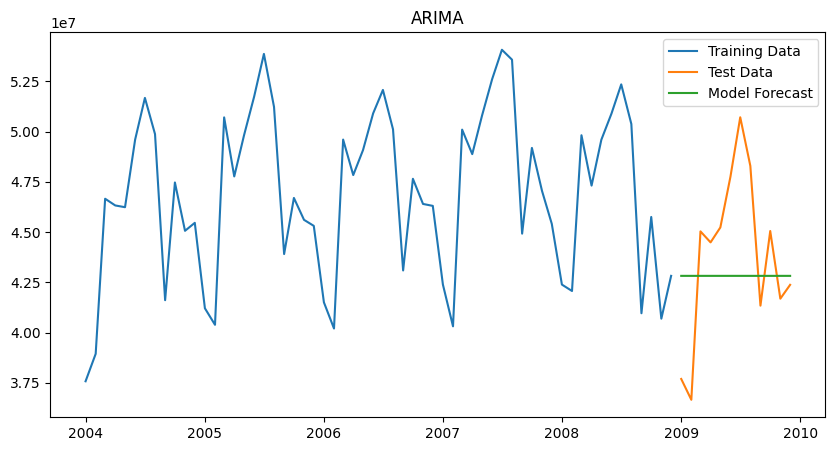

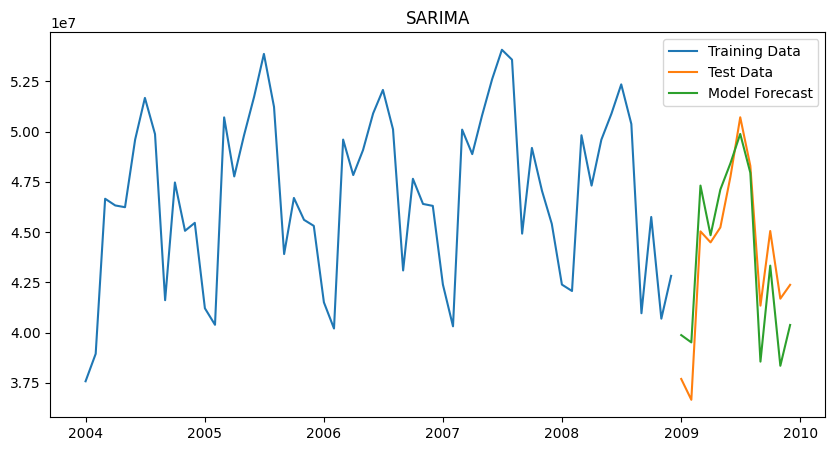

In [58]:
y.show('2009', '2004')

## Metrics

In order to measure the accuracy of the models, $R^2$ Score, Mean Squared Error, and Mean Absolute Error are used.

$R^2$ ranges from -$\infty$ to 1, with positive values being better than the mean on average. $R^2$ is defined as $$1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \overline{y})^2}$$

MSE represents the average squared error of the predicted terms versus the actual terms. MSE is defined as $$\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

MAE represents the average positive error of the predicted terms versus the actual terms. MSE is more critical of outliers because they have a higher weight when compared to MAE. MAE is defined as $$\frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$$

In general, a model with a higher $R^2$ score and a lower MAE and MSE is more accurate than a model with a lower $R^2$ score and higher MSE and MAE, although it is possible for one model to have a better MAE but a worse MSE than another model.

### Demonstration

C:\Users\Dow\AppData\Local\Temp\ipykernel_10748\737423935.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-X

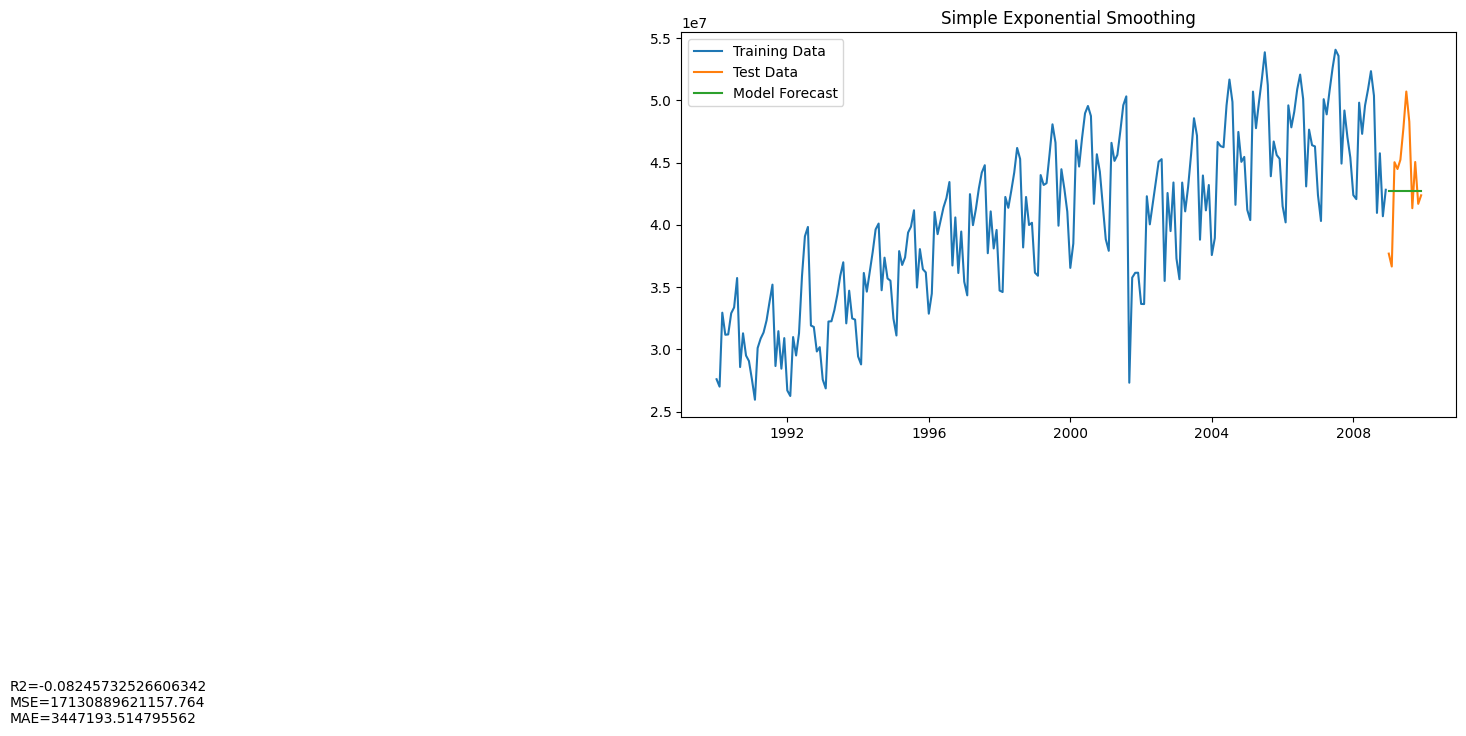

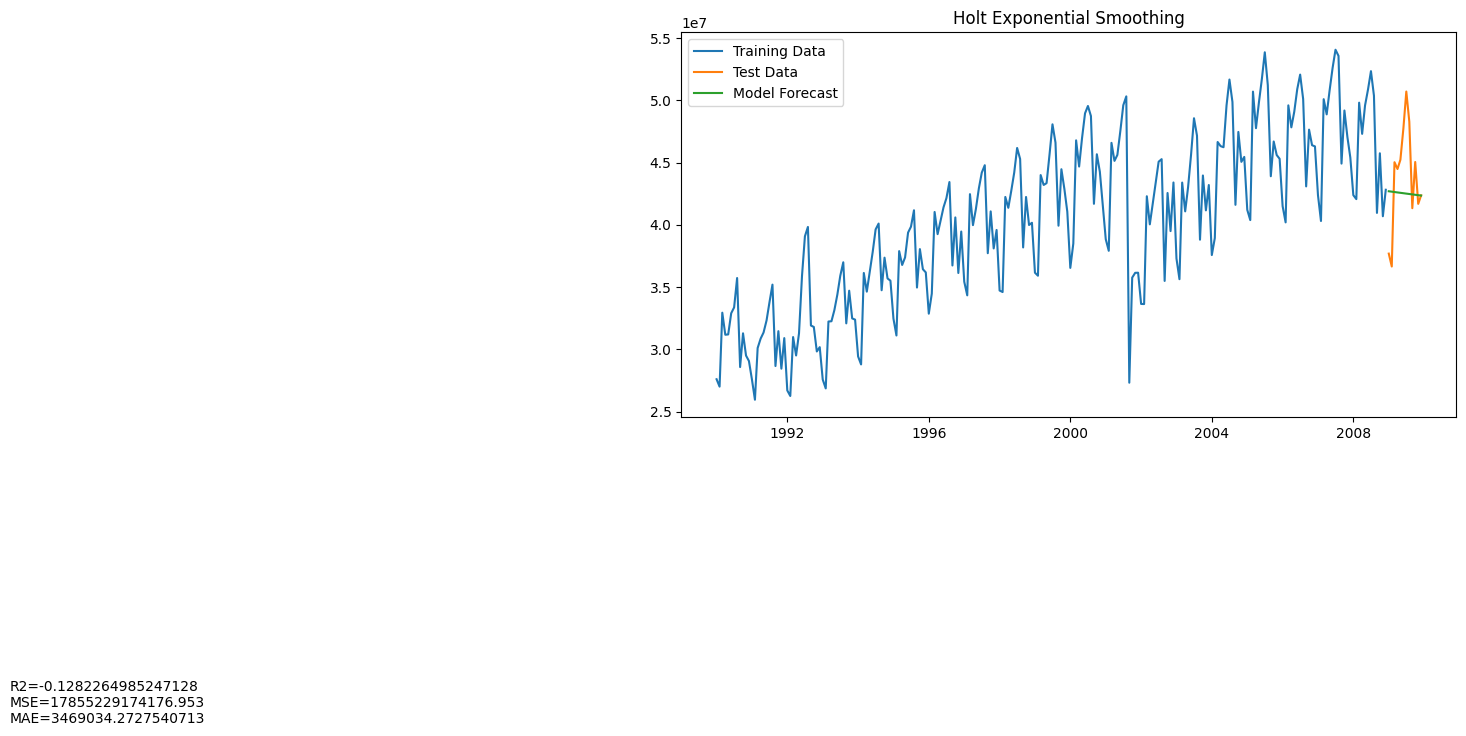

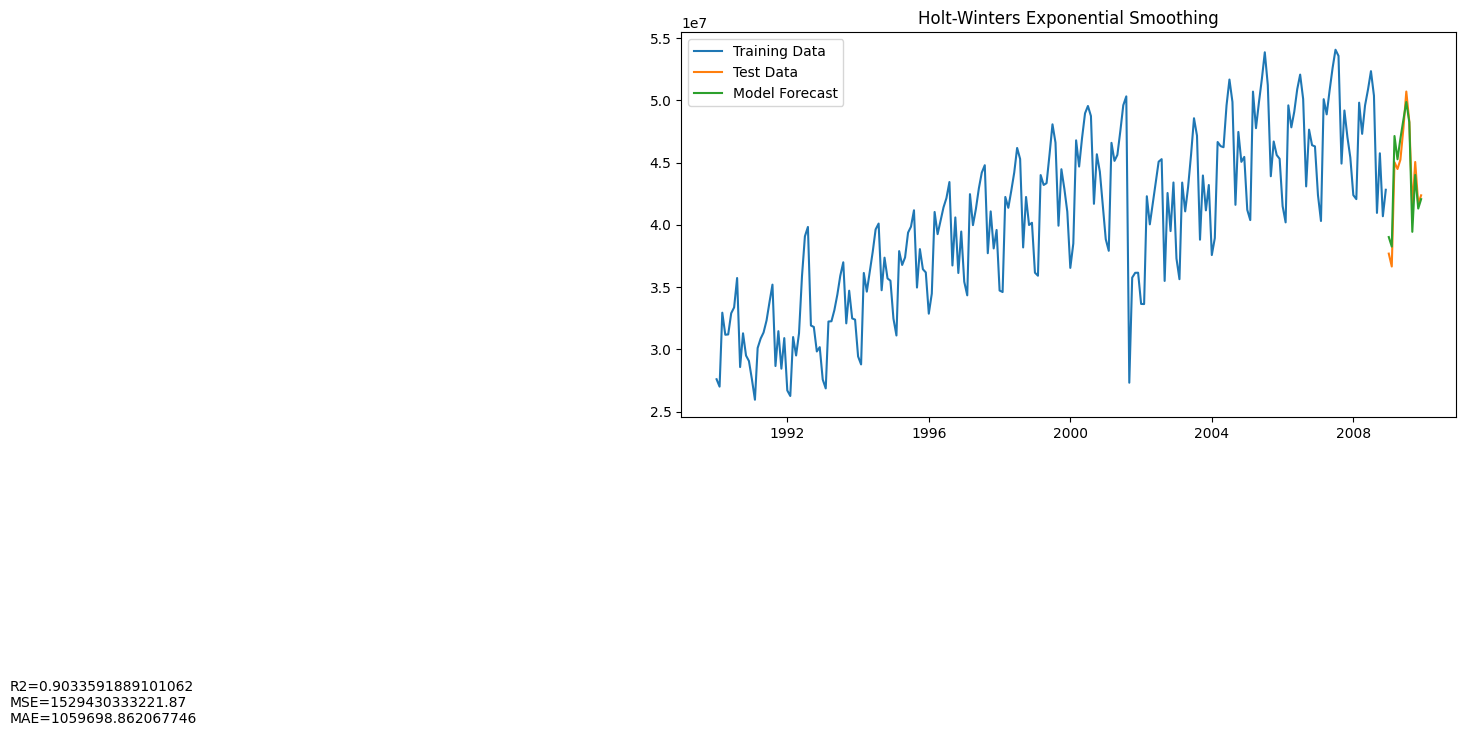

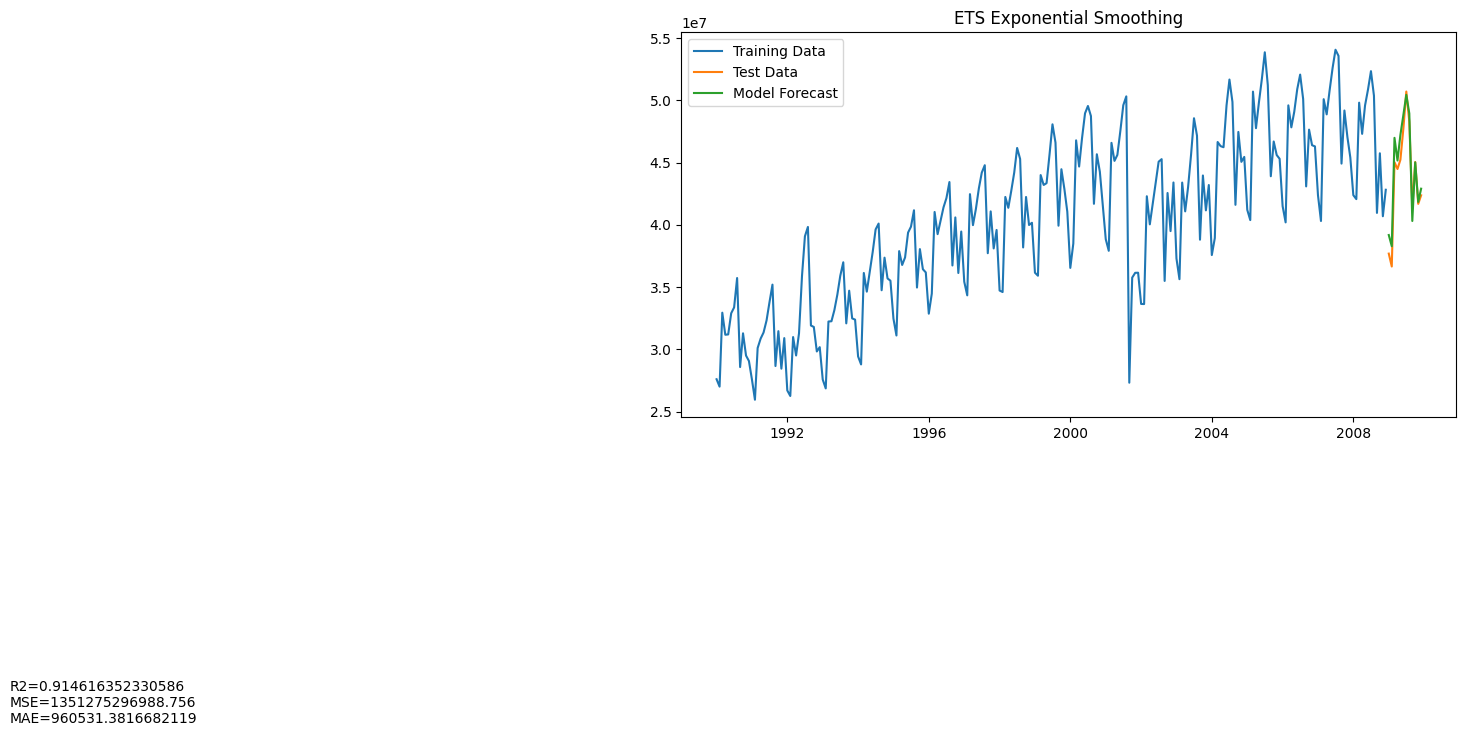

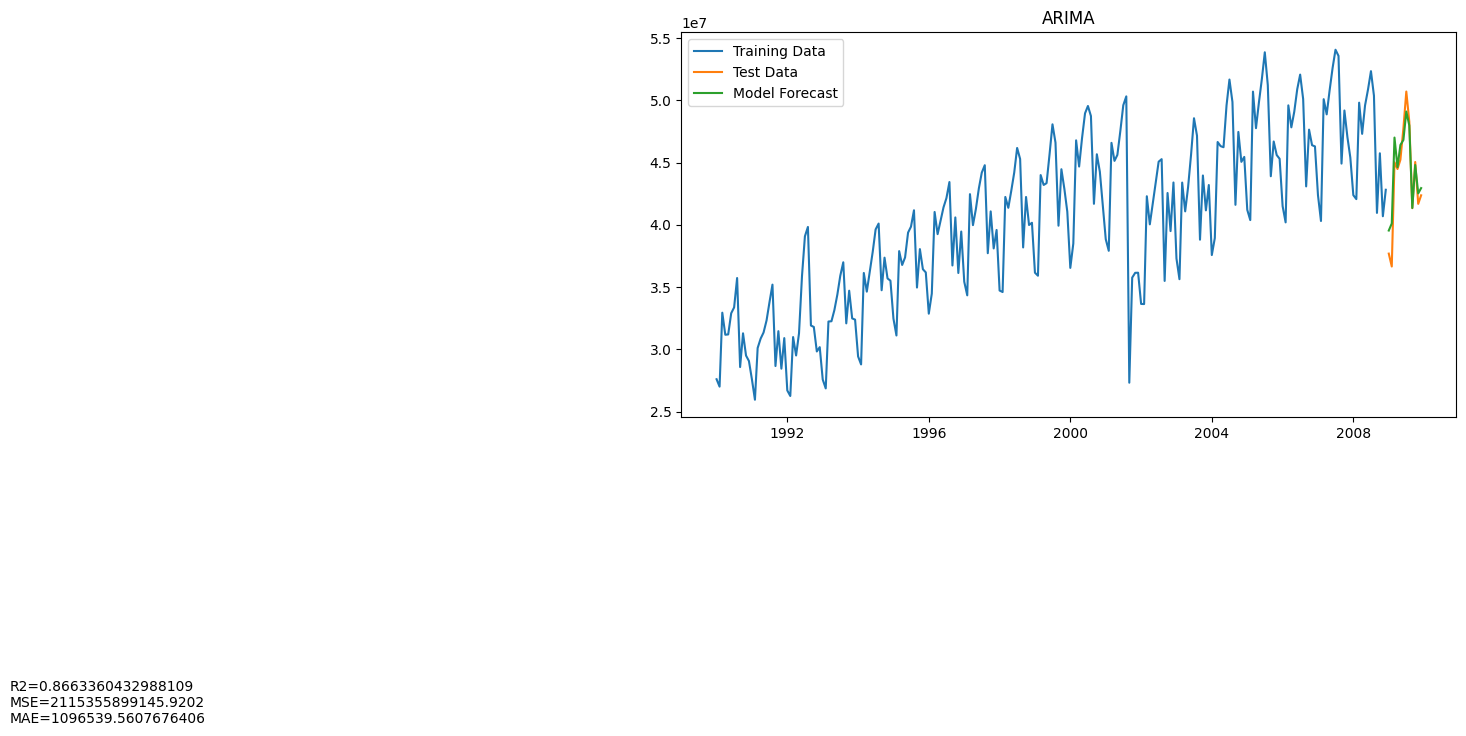

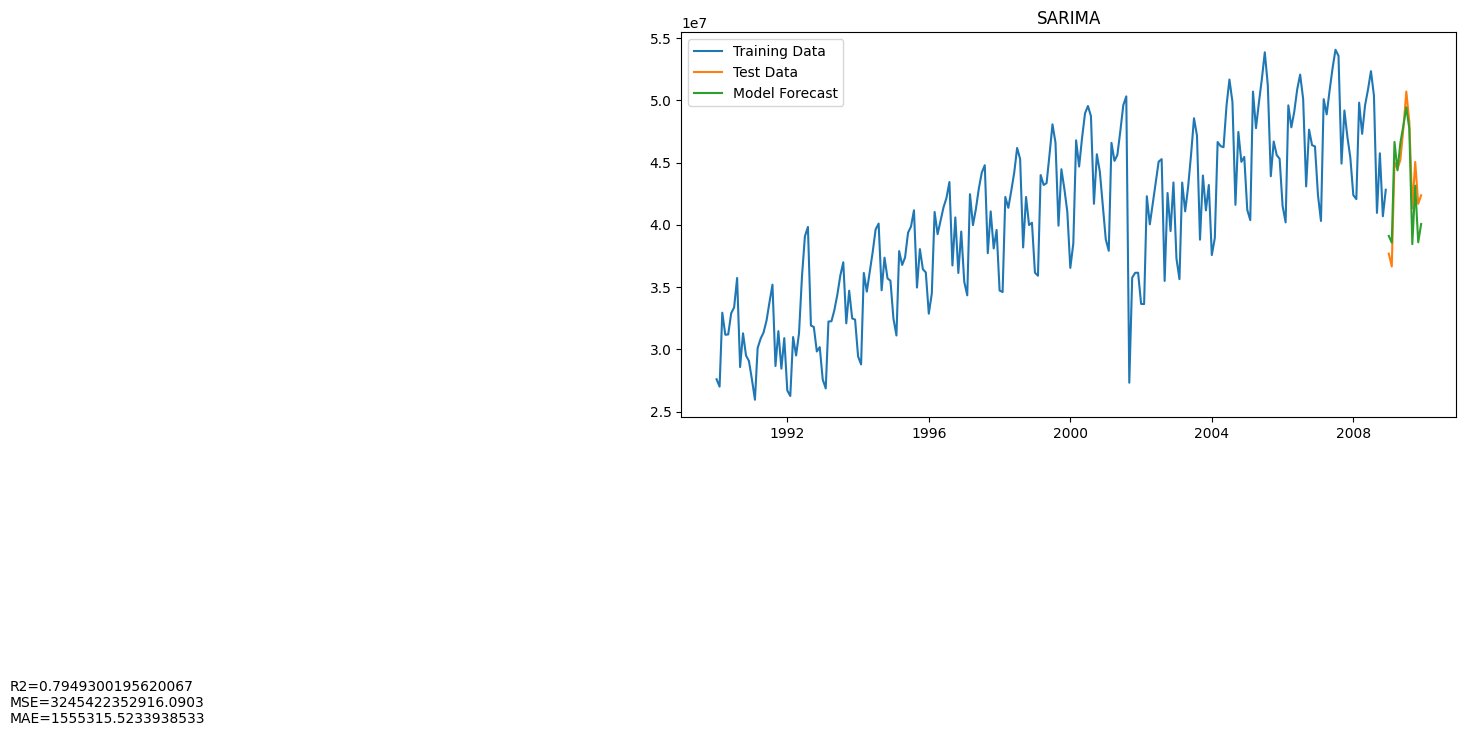

In [59]:
y.show("2009", metrics=True)

In [60]:
y.performance

split                               title        R2           MSE  \
0   1990-2009        Simple Exponential Smoothing -0.082457  1.713089e+13   
1   1990-2009          Holt Exponential Smoothing -0.128226  1.785523e+13   
2   1990-2009  Holt-Winters Exponential Smoothing  0.903359  1.529430e+12   
3   1990-2009           ETS Exponential Smoothing  0.914616  1.351275e+12   
4   1990-2009                               ARIMA  0.866336  2.115356e+12   
5   1990-2009                              SARIMA  0.794930  3.245422e+12   
6   1990-2008        Simple Exponential Smoothing -0.097765  1.958223e+13   
7   1990-2008          Holt Exponential Smoothing -3.024136  7.178363e+13   
8   1990-2008  Holt-Winters Exponential Smoothing -0.227732  2.190062e+13   
9   1990-2008           ETS Exponential Smoothing -0.062908  1.896045e+13   
10  1990-2008                               ARIMA  0.386768  1.093900e+13   
11  1990-2008                              SARIMA  0.528956  8.402610e+12   
12  1990-2007        Simple Exponential Smoothing -0.005076  2.013215e+13   
13  1990-2007          Holt Exponential Smoothing -4.576672  1.117034e+14   
14  1990-2007  Holt-Winters Exponential Smoothing  0.067825  1.867191e+13   
15  1990-2007           ETS Exponential Smoothing  0.316269  1.369547e+13   
16  1990-2007                               ARIMA  0.216629  1.569130e+13   
17  1990-2007                              SARIMA  0.226287  1.549784e+13   
18  2004-2009        Simple Exponential Smoothing -0.100076  1.740973e+13   
19  2004-2009          Holt Exponential Smoothing -0.230080  1.946715e+13   
20  2004-2009  Holt-Winters Exponential Smoothing -0.215513  1.923661e+13   
21  2004-2009           ETS Exponential Smoothing  0.878563  1.921861e+12   
22  2004-2009                               ARIMA -0.068048  1.690286e+13   
23  2004-2009                              SARIMA  0.742831  4.069936e+12   

             MAE  
0   3.447194e+06  
1   3.469034e+06  
2   1.059699e+06  
3   9.605314e+05  
4   1.096540e+06  
5   1.555316e+06  
6   3.795235e+06  
7   7.162482e+06  
8   4.173763e+06  
9   3.906142e+06  
10  2.676806e+06  
11  2.548607e+06  
12  3.859137e+06  
13  8.809496e+06  
14  3.424829e+06  
15  2.894331e+06  
16  3.070154e+06  
17  3.069428e+06  
18  3.466550e+06  
19  3.624343e+06  
20  3.666473e+06  
21  1.171139e+06  
22  3.429760e+06  
23  1.768832e+06

In [61]:
y.performance.groupby(by=['split']).apply(lambda x: x[x['R2'] == x['R2'].max()])

split                      title        R2           MSE  \
split                                                                        
1990-2007 15  1990-2007  ETS Exponential Smoothing  0.316269  1.369547e+13   
1990-2008 11  1990-2008                     SARIMA  0.528956  8.402610e+12   
1990-2009 3   1990-2009  ETS Exponential Smoothing  0.914616  1.351275e+12   
2004-2009 21  2004-2009  ETS Exponential Smoothing  0.878563  1.921861e+12   

                       MAE  
split                       
1990-2007 15  2.894331e+06  
1990-2008 11  2.548607e+06  
1990-2009 3   9.605314e+05  
2004-2009 21  1.171139e+06

In [62]:
y.performance.groupby(by=['split']).apply(lambda x: x[x['MSE'] == x['MSE'].min()])

split                      title        R2           MSE  \
split                                                                        
1990-2007 15  1990-2007  ETS Exponential Smoothing  0.316269  1.369547e+13   
1990-2008 11  1990-2008                     SARIMA  0.528956  8.402610e+12   
1990-2009 3   1990-2009  ETS Exponential Smoothing  0.914616  1.351275e+12   
2004-2009 21  2004-2009  ETS Exponential Smoothing  0.878563  1.921861e+12   

                       MAE  
split                       
1990-2007 15  2.894331e+06  
1990-2008 11  2.548607e+06  
1990-2009 3   9.605314e+05  
2004-2009 21  1.171139e+06

In [63]:
y.performance.groupby(by=['split']).apply(lambda x: x[x['MAE'] == x['MAE'].min()])

split                      title        R2           MSE  \
split                                                                        
1990-2007 15  1990-2007  ETS Exponential Smoothing  0.316269  1.369547e+13   
1990-2008 11  1990-2008                     SARIMA  0.528956  8.402610e+12   
1990-2009 3   1990-2009  ETS Exponential Smoothing  0.914616  1.351275e+12   
2004-2009 21  2004-2009  ETS Exponential Smoothing  0.878563  1.921861e+12   

                       MAE  
split                       
1990-2007 15  2.894331e+06  
1990-2008 11  2.548607e+06  
1990-2009 3   9.605314e+05  
2004-2009 21  1.171139e+06

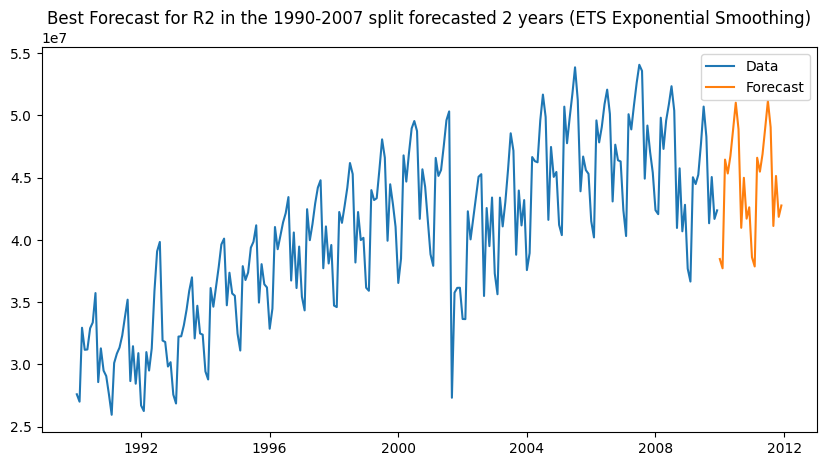

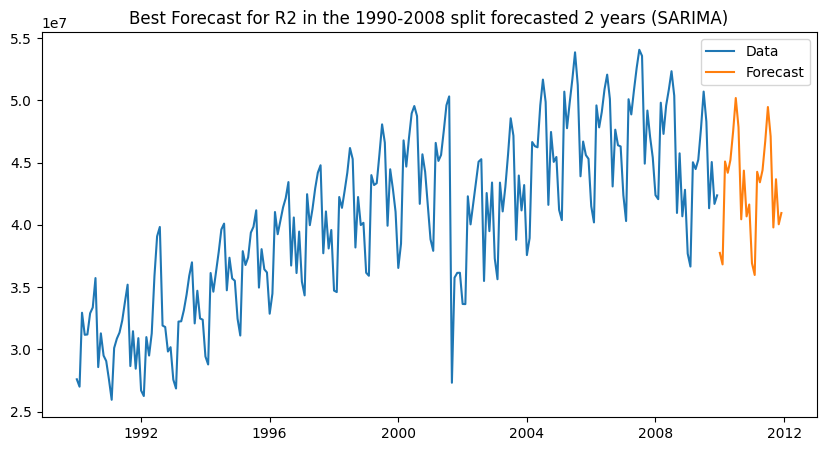

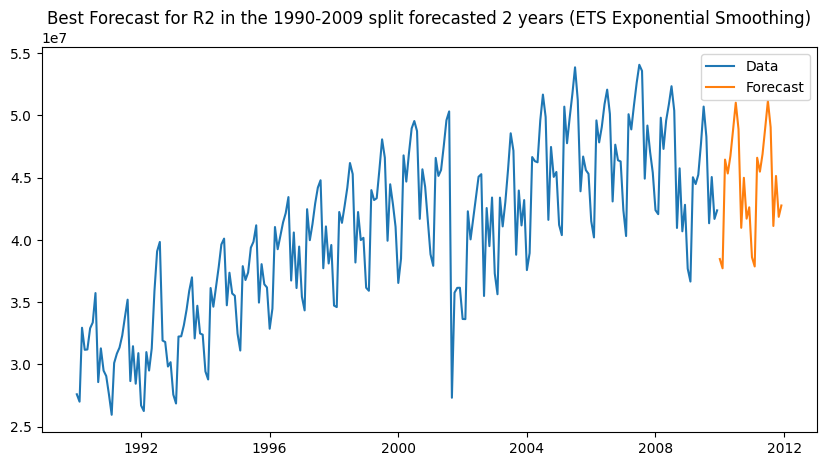

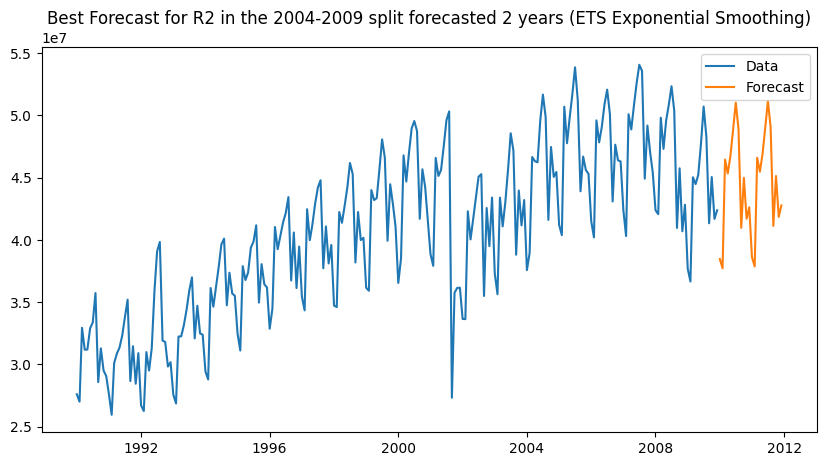

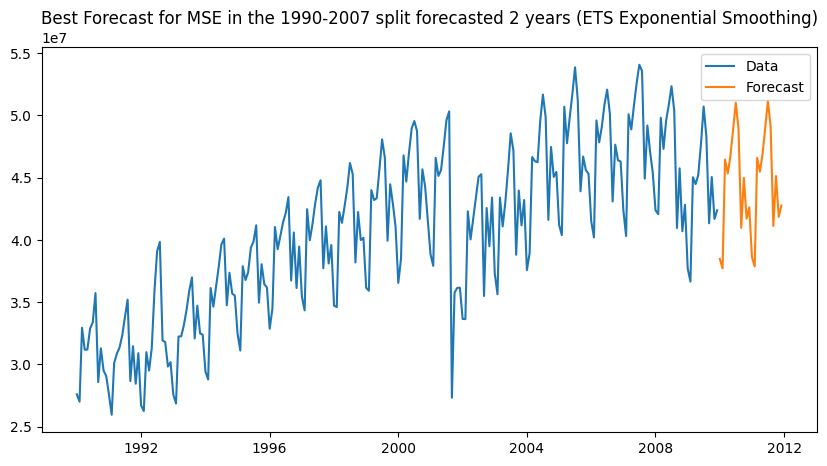

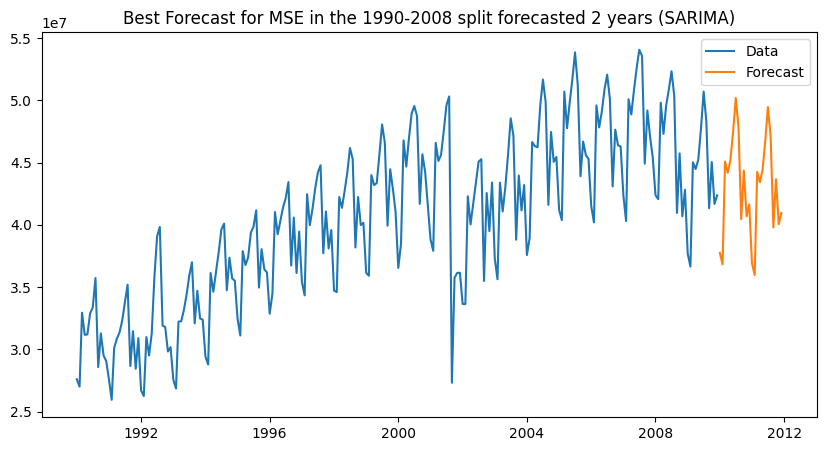

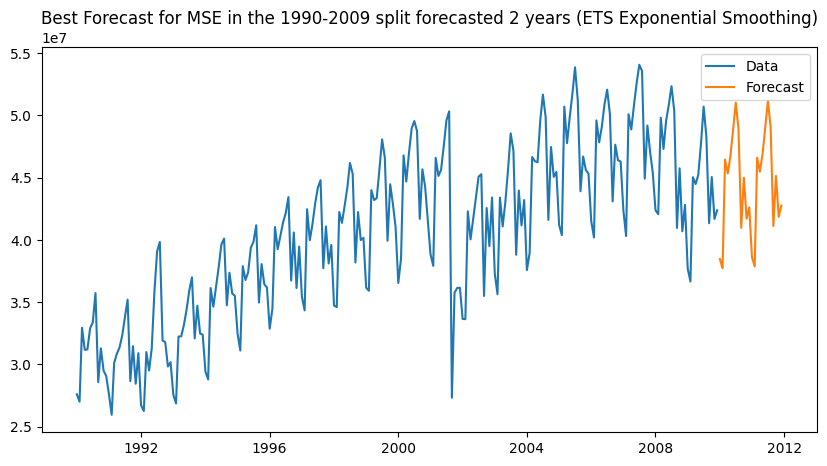

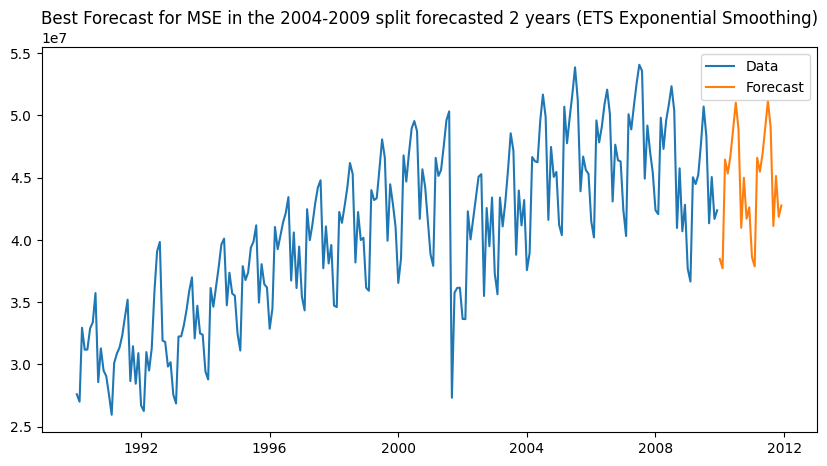

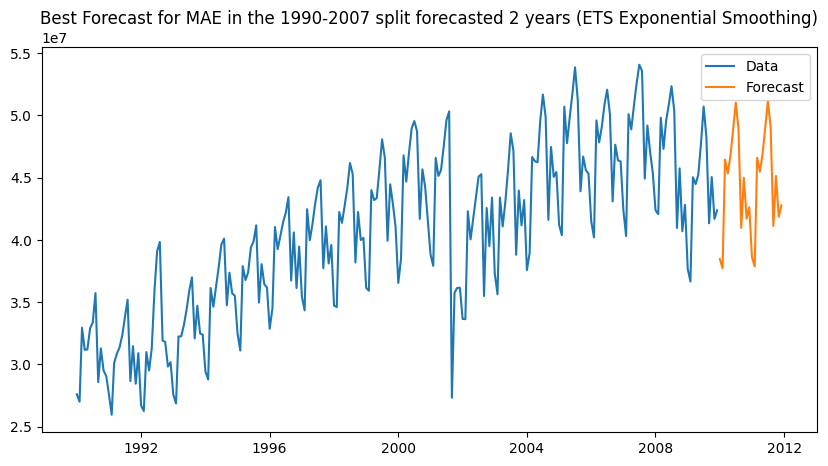

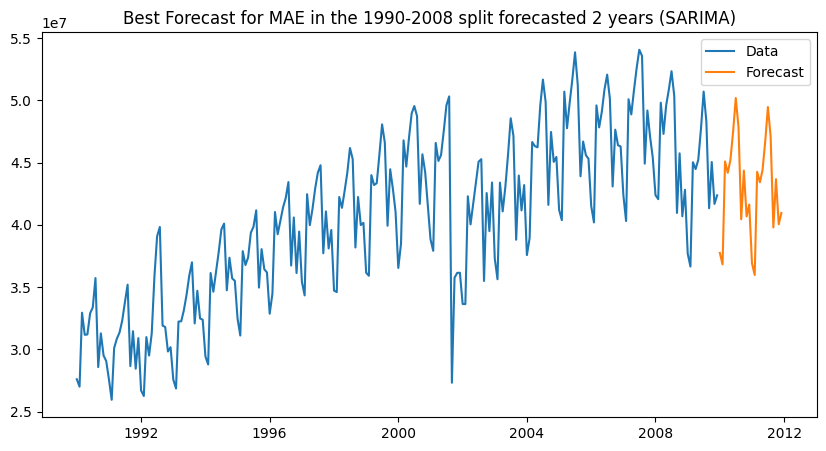

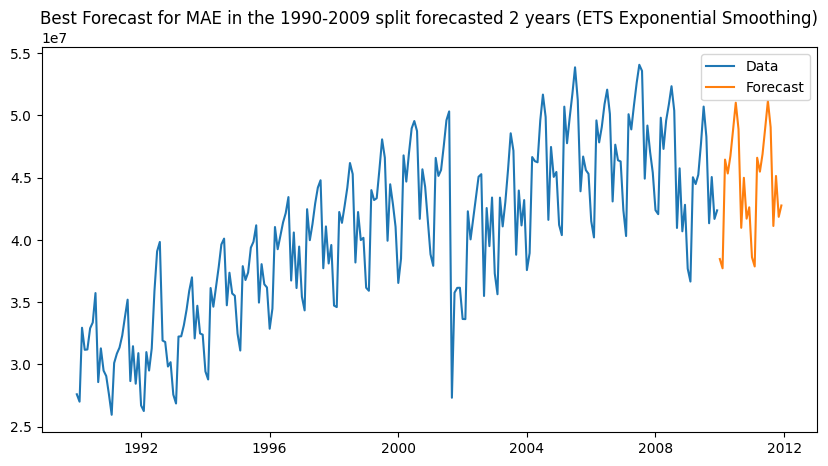

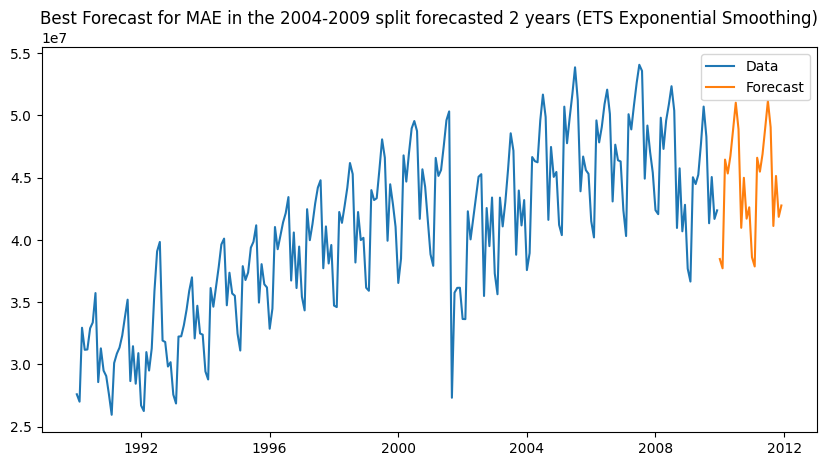

In [66]:
y.showBest(2)

#### Example use case
Finally we have our answer. Given the whole dataset, a business in 2009 can expect their 2010 expenditures to be as follows:

In [65]:
bestModel = modelClass(ARIMA, "SARIMA", {"order":(1,1,0), "seasonal_order":(1,1,0,12)})
exp = bestModel.predict(dat, 1)
exp.map(lambda x: x/exp.sum())

Fly Date
2010-01-01    0.072357
2010-02-01    0.070588
2010-03-01    0.086424
2010-04-01    0.084686
2010-05-01    0.086652
2010-06-01    0.091060
2010-07-01    0.096193
2010-08-01    0.091711
2010-09-01    0.077529
2010-10-01    0.085021
2010-11-01    0.077977
2010-12-01    0.079802
Name: forecast, dtype: float64

So the expected expenses in January should be comprised of 7% of the budget, Feburary should be 6.8%, March 8.5%, etc.

### Summary

In conclusion, statistical validation of model selection for time series forecasting is very possible to implement using the steps above. This differs from Rabbani's study in that it explicitly provides a generalizable method for univariate time series forecasting. This study is limited in its scope as it doesn't calculate the order of the trend and seasonality in the data, instead assuming that it is of additive trend and seasonality. It could be improved upon by calculating for these using techniques like differencing and BoxCox to create stationary data, then adjusting the model parameters automatically.

### Takeaway
Choosing a proper model for time series forecasting is a process that can be repeated for any time series data and should be implemented whenever statistical analysis using time series forecasting is discussed.

##### Progress
- Learned how to import and modify the data in pandas, working with DataFrame objects, etc.
- Learned the process behind time series splits and the necessary methods to do so
- Learned the metrics used to measure the accuracy of the models, the mathematical definitions of said metrics, and their meaning and individual pros and cons
- Learned the implementation of the time series analysis models in statsmodels as well as their mathematical definitions
- Implemented the objects used to easily present these concepts by tying everything together

### Acknowledgements
I would like to thank Brett Warren for his help and guidance with this project. I would not have been able to complete this without him, I learned virtually everything I did in this project at his recommendation.

### Citations
Rabbani, M. B. A., Musarat, M. A., Alaloul, W. S., Rabbani, M. S., Maqsoom, A., Ayub, S., ...
Altaf, M. (2021). a comparison between seasonal autoregressive integrated moving
average (sarima) and exponential smoothing (es) based on time series model for forecasting
road accidents. Arabian Journal for Science and Engineering, 46(11), 11113–11138


McKinney, W., et al. (2011). pandas: a foundational python library for data analysis and
statistics. Python for high performance and scientific computing, 14(9), 1–9